In [1]:
#PCA combina variables para maximizar la información
#Kernel redimensiona el modelo haciendo mejores ajustes
#Regularizacion introduce sesgo para reducir la varianza de los datos


import pandas as pd
import sklearn
import matplotlib.pyplot as plt 

In [26]:
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
 
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
dt_heart = pd.read_csv('data/heart.csv')

# Guardamos nuestro dataset sin la columna de target, ya que target es el clasificador y no corresponde a un feature
dt_features = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

# Normalizamos los datos
dt_features = StandardScaler().fit_transform(dt_features)

# Partimos el conjunto de entrenamiento. Para añadir replicabilidad usamos el random state
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

In [24]:
# por defecto n_components = min(n_columnas, n_filas)
#el n_components es la cantidad de features artificiales que va a usar pca o ipca, reduciendo coste computacional y metiendo solo la informacion importante al modelo
pca = PCA(n_components=3)
pca.fit(X_train)
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, copy=True, n_components=3, whiten=False)

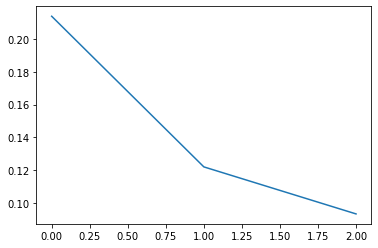

In [25]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()
# notar que la primera componente (o columna) es la que mas induce varianza

In [28]:
logistic = LogisticRegression(solver='lbfgs') #el solver lbfgs evita warnings y errores

# aplicar pca tanto sobre conjunto de pruebas como entrenamiento 
dt_train = pca.transform(X_train)
dt_test = pca. transform(X_test)
logistic.fit(dt_train, y_train)
log_predic = logistic.predict(dt_test)
print("SCORE PCA: ", logistic.score(dt_test, y_test))

#analogamente con ipca
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE IPCA: ", logistic.score(dt_test, y_test)) 

SCORE PCA:  0.7824675324675324
SCORE IPCA:  0.8214285714285714


In [30]:
#Aplicamos la función de kernel de tipo polinomial
kpca = KernelPCA(n_components=3, kernel='poly' )
#Vamos a ajustar los datos
kpca.fit(X_train)

#Aplicamos el algoritmo a nuestros datos de prueba y de entrenamiento
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

#Aplicamos la regresión logística un vez que reducimos su dimensionalidad
logistic = LogisticRegression(solver='lbfgs')

#Entrenamos los datos
logistic.fit(dt_train, y_train)

#Imprimimos los resultados
print("SCORE KPCA: ", logistic.score(dt_test, y_test))

SCORE KPCA:  0.8084415584415584


In [33]:
#Regularizacion
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

#... continuará